In [2]:
"""
Initial work to plot the desired lat/lon grid used in commute time

Produces a map showing high resolution background imagery provided by OpenStreetMap.
Reference:
http://scitools.org.uk/cartopy/docs/latest/examples/tube_stations.html

"""
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import pandas


imagery = OSM() # Use Open street maps data
ax = plt.axes(projection=imagery.crs)
ax.set_extent([-78, -74, 38, 41], ccrs.Geodetic()) #longitude, latitude (x1,x2,y1,y2)
#note: later, use the max/min lat/lon from calculated grid to set this


# Add the imagery to the map. Later iterations will need to intellegently determine zoom level
#ax.add_image(imagery, 5) #too low resolution
ax.add_image(imagery, 7) #good
#ax.add_image(imagery, 8) #too high resolution


**Dummy locations being used (lat/lon)**

- Baltimore: (39,-77)
- Philadelphia: (40,-75)

Note: Cartopy uses lon/lat ordering for processing


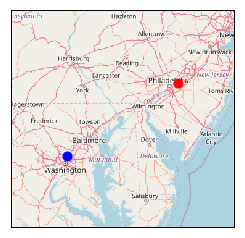

In [3]:
imagery = OSM() # Use Open street maps data
ax = plt.axes(projection=imagery.crs)
ax.set_extent([-78, -74, 38, 41], ccrs.Geodetic()) #longitude, latitude (x1,x2,y1,y2)


# Add the imagery to the map. Later iterations will need to intellegently determine zoom level
#ax.add_image(imagery, 5) #too low resolution
ax.add_image(imagery, 7) #good
#ax.add_image(imagery, 8) #too high resolution

#These are values which will be defined through address lookup in other modules
afDest1=np.array([-77.0,39.0]) #lon/lat #make sure this is a float
afDest2=np.array([-75.0,40.0]) #lon/lat


#Start
plt.plot(afDest1[0], afDest1[1],
         marker='o', color='blue', markersize=9, transform=ccrs.Geodetic(),
         linestyle='')

#Stop
plt.plot(afDest2[0], afDest2[1],
         marker='o', color='red', markersize=9, transform=ccrs.Geodetic(),
         linestyle='')

In [4]:
##Define square (not rotated)

origin=np.array([0,0])
corner=afDest2-afDest1
#pythagorean theorm for distance, 45-45-90 triangle for ratio to side
hypotenuse=np.sqrt((corner[0]**2+corner[1]**2)) 
side=hypotenuse/np.sqrt(2) 
#specify spacing for side
spacing=np.linspace(0,side,num=10,endpoint=True)

#Create an initial grid 
 #Create a mesh grid
 #Transpose to make each lat/lon point into a row
 #reshape to combine multiple arrays into one
aInitGrid=np.array(np.meshgrid(spacing, spacing, indexing='xy')).T.reshape(-1, 2)


#test= np.array(np.meshgrid([0,1,2], [4,5,6], indexing='ij'))
#test=np.array(np.meshgrid([0,1,2], [4,5,6], indexing='xy')).T.reshape(-1, 2)



# dataframe of (lon/lat) pairs
dfGrid=pandas.DataFrame(aInitGrid,columns=['RelLon','RelLat']) 





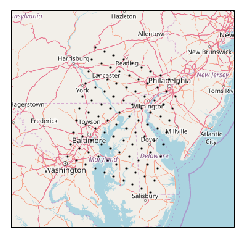

In [5]:
imagery = OSM() # Use Open street maps data
ax = plt.axes(projection=imagery.crs)
ax.set_extent([-78, -74, 38, 41], ccrs.Geodetic()) #longitude, latitude (x1,x2,y1,y2)


# Add the imagery to the map. Later iterations will need to intellegently determine zoom level
#ax.add_image(imagery, 5) #too low resolution
ax.add_image(imagery, 7) #good
#ax.add_image(imagery, 8) #too high resolution


##do the math to rotate the grid and reset origin

#calculate rotation of square relative to lat/lon, subtract 45deg inside square
fTheta=np.arcsin(corner[1]/hypotenuse)-(np.pi/4) #use to avoid a divide by zero possibility



#rotate grid
dfGrid['Lon']=dfGrid['RelLon']*np.cos(fTheta)-dfGrid['RelLat']*np.sin(fTheta)
dfGrid['Lat']=dfGrid['RelLon']*np.sin(fTheta)+dfGrid['RelLat']*np.cos(fTheta)

#move back to origin
dfGrid['CorrLon']=dfGrid['Lon']+afDest1[0]
dfGrid['CorrLat']=dfGrid['Lat']+afDest1[1]




#plot coarse grid
plt.plot(dfGrid['CorrLon'],dfGrid['CorrLat'],
         marker='o', color='black', markersize=1, transform=ccrs.Geodetic(),
         linestyle='')


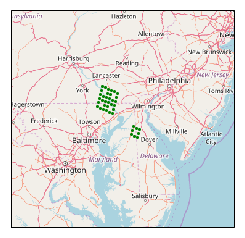

In [6]:
imagery = OSM() # Use Open street maps data
ax = plt.axes(projection=imagery.crs)
ax.set_extent([-78, -74, 38, 41], ccrs.Geodetic()) #longitude, latitude (x1,x2,y1,y2)


# Add the imagery to the map. Later iterations will need to intellegently determine zoom level
#ax.add_image(imagery, 5) #too low resolution
ax.add_image(imagery, 7) #good
#ax.add_image(imagery, 8) #too high resolution


#for arbitrary point, increase resolution 
aHRDFs=[] #ititialize list of highres dataframes
for i in [25,35,26,36, 64]:
    dfGrid.loc[i,'RelLon']
    spacing[1] # default space
    fHRSpace=spacing[1]/3 # high resolution space (0.33 to avoid overlap)
    
    #xarray centered on coarse point
    fLonTemp=dfGrid.loc[i,'RelLon']
    afLonTemp=np.linspace(fLonTemp-fHRSpace,fLonTemp+fHRSpace,num=3,endpoint=True)
    #yarray centered on coarse point
    fLatTemp=dfGrid.loc[i,'RelLat']
    afLatTemp=np.linspace(fLatTemp-fHRSpace,fLatTemp+fHRSpace,num=3,endpoint=True)
    
    aTempGrid=np.array(np.meshgrid(afLonTemp, afLatTemp, indexing='xy')).T.reshape(-1, 2)
    dfTempGrid=pandas.DataFrame(aTempGrid,columns=['RelLon','RelLat']) 
    
    #remove existing data point to avoid duplicating API call
    dfTempGrid.drop(index=[4], inplace=True)
    
    
    #rotate grid
    dfTempGrid['Lon']=dfTempGrid['RelLon']*np.cos(fTheta)-dfTempGrid['RelLat']*np.sin(fTheta)
    dfTempGrid['Lat']=dfTempGrid['RelLon']*np.sin(fTheta)+dfTempGrid['RelLat']*np.cos(fTheta)
    
    
    #correct to final grid
    dfTempGrid['CorrLon']=dfTempGrid['Lon']+afDest1[0]
    dfTempGrid['CorrLat']=dfTempGrid['Lat']+afDest1[1]



    #plot fine grid
    plt.plot(dfTempGrid['CorrLon'],dfTempGrid['CorrLat'],
             marker='o', color='green', markersize=2, transform=ccrs.Geodetic(),
             linestyle='')

    #append temporary data frame to list
    aHRDFs.append(dfTempGrid)



#Combine all: append temp dataframes with main dataframe
#temp=dfGrid.copy()
aHRDFs.append(dfGrid) #add main dataframe
dfGrid=pandas.concat(aHRDFs,ignore_index=True) #combine everything



In [ ]:
#figure out how to plot points in dataframe to voronoi plot
#done to most acurately visualize transit time near points
from scipy.spatial import Voronoi, voronoi_plot_2d
import shapely.geometry
import shapely.ops



#points = np.random.random((10, 2))
points=dfGrid.loc[:,['CorrLon','CorrLat']]


vor = Voronoi(points)
voronoi_plot_2d(vor)


#https://stackoverflow.com/questions/20515554/colorize-voronoi-diagram
#look at function to bound





for i in range(len(vor.points)): #Index of the Voronoi region for each input point
    print ('Point Coord: ' + str(vor.points[i]))
    print ('Region: '+str(vor.point_region[i]))
    print ('Region vertices (indexes): '+str(vor.regions[vor.point_region[i]]))
    for j in vor.regions[vor.point_region[i]]:
        if j == -1:
            print ('No Vertex')
        else:
            print ('Vertex: '+str(vor.vertices[j]))
    print (' ')

#pass list of points for creating polygon
poly=shapely.geometry.Polygon(vor.vertices[[3,2,0,1]])
print(vor.vertices[[3,2,0,1]])
print(poly.wkt)  # prints: 'POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))'


#need to iterate through point list to generate new regions
#figure out how ridge lines can be used to bound


In [ ]:
'''
#cartopy plotting of shapes

import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
#http://scitools.org.uk/cartopy/docs/v0.14/examples/hurricane_katrina.html
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    # this will change if the storm intersects with our track
    facecolor = [0.9375, 0.9375, 0.859375]
    edgecolor = 'black'
    
    ax.add_geometries([state], ccrs.PlateCarree(),
                  facecolor=facecolor, edgecolor=edgecolor)
#Note:state is a "shapely.geometry.multipolygon.MultiPolygon"
'''

In [ ]:
'''
#voronoi to shapely
#https://stackoverflow.com/questions/27548363/from-voronoi-tessellation-to-shapely-polygons
lines = [
    shapely.geometry.LineString(vor.vertices[line])
    for line in vor.ridge_vertices
    if -1 not in line
]

for poly in shapely.ops.polygonize(lines):
    #do something with each polygon
#note: poly is a 'shapely.geometry.polygon.Polygon'
'''

In [ ]:
'''
#https://github.com/SciTools/cartopy/issues/917
plt.contourf(lons, lats, sst, 60, cmap='jet',
     transform=ccrs.PlateCarree())
'''  

In [ ]:
#assign random values to dataframe column
dfGrid.loc[:,'Value']=np.random.random((len(dfGrid),1))
dfGrid.loc[:,'Value']=dfGrid.loc[:,'Value']*20 # to test if normalization is necessary

#colorize values on scale
import matplotlib
import seaborn

#dfGrid.loc[:,'Value'].max()
#dfGrid.loc[:,'Value'].min()
#dfGrid.loc[:,'Norm'].max()
#dfGrid.loc[:,'Norm'].min()

#set normalized values for determining color map values
#normval = (value-min) / (max-min)
dfGrid.loc[:,'Norm']=(dfGrid.loc[:,'Value']-dfGrid.loc[:,'Value'].min())/(dfGrid.loc[:,'Value'].max()-dfGrid.loc[:,'Value'].min())


#test without normalized data
cmap = matplotlib.cm.get_cmap('Spectral')
dfGrid.loc[:,'Color']=cmap(dfGrid.loc[:,'Value'],alpha=0.25)



In [ ]:
'''
#if necessary, define new colormap
# Choose colormap
cmap = plt.cm.RdBu
# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))
# Set alpha
my_cmap[:,-1] = .5
my_cmap[1:5]
# Create new colormap
my_cmap = ListedColormap(my_cmap)
'''

In [ ]:
'''
#https://stackoverflow.com/questions/30457089/how-to-create-a-polygon-given-its-point-vertices
from shapely import geometry

poly = geometry.Polygon([[p.x, p.y] for p in pointList])

print(poly.wkt)  # prints: 'POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))'
'''

Point Coord: [ 0.  0.]
Region: 1
Region vertices (indexes): [-1, 0]
No Vertex
Vertex: [ 0.5  0.5]
 
Point Coord: [ 0.  1.]
Region: 8
Region vertices (indexes): [2, -1, 0]
Vertex: [ 0.5  1.5]
No Vertex
Vertex: [ 0.5  0.5]
 
Point Coord: [ 0.  2.]
Region: 6
Region vertices (indexes): [-1, 2]
No Vertex
Vertex: [ 0.5  1.5]
 
Point Coord: [ 1.  0.]
Region: 3
Region vertices (indexes): [1, -1, 0]
Vertex: [ 1.5  0.5]
No Vertex
Vertex: [ 0.5  0.5]
 
Point Coord: [ 1.  1.]
Region: 7
Region vertices (indexes): [3, 2, 0, 1]
Vertex: [ 1.5  1.5]
Vertex: [ 0.5  1.5]
Vertex: [ 0.5  0.5]
Vertex: [ 1.5  0.5]
 
Point Coord: [ 1.  2.]
Region: 4
Region vertices (indexes): [3, -1, 2]
Vertex: [ 1.5  1.5]
No Vertex
Vertex: [ 0.5  1.5]
 
Point Coord: [ 2.  0.]
Region: 2
Region vertices (indexes): [-1, 1]
No Vertex
Vertex: [ 1.5  0.5]
 
Point Coord: [ 2.  1.]
Region: 9
Region vertices (indexes): [3, -1, 1]
Vertex: [ 1.5  1.5]
No Vertex
Vertex: [ 1.5  0.5]
 
Point Coord: [ 2.  2.]
Region: 5
Region vertices (ind

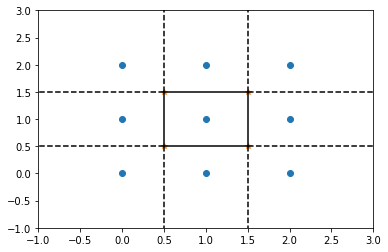

In [10]:
#Voronoi experimentation
import matplotlib.pyplot as plt
import numpy as np
import shapely

points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                    [2, 0], [2, 1], [2, 2]])
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)


#voronoi_plot_2d(vor)

#vor.points
#vor.vertices

for i in range(len(vor.points)): #Index of the Voronoi region for each input point
    print ('Point Coord: ' + str(vor.points[i]))
    print ('Region: '+str(vor.point_region[i]))
    print ('Region vertices (indexes): '+str(vor.regions[vor.point_region[i]]))
    for j in vor.regions[vor.point_region[i]]:
        if j == -1:
            print ('No Vertex')
        else:
            print ('Vertex: '+str(vor.vertices[j]))
    print (' ')

#pass list of points for creating polygon
#poly=shapely.geometry.Polygon(vor.vertices[[3,2,0,1]])
#print(vor.vertices[[3,2,0,1]])
#print(poly.wkt)  # prints: 'POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))'


#https://docs.scipy.org/doc/scipy/reference/tutorial/spatial.html
plt.plot(points[:, 0], points[:, 1], 'o') #points
plt.plot(vor.vertices[:, 0], vor.vertices[:, 1], '*') #vertices
plt.xlim(-1, 3); plt.ylim(-1, 3)

for simplex in vor.ridge_vertices:
    simplex = np.asarray(simplex)
    #print (simplex)
    #print (np.all(simplex >= 0)) #check if ridge vertex is finite
    if np.all(simplex >= 0): #plot only lines with finite vertices
        #select point from vertices (real space) array using index from  ridge vertices(index)
        plt.plot(vor.vertices[simplex, 0], vor.vertices[simplex, 1], 'k-')

#pointidx = np.asarray([0, 1]) #horizontal line #indicies of points
#pointidx = np.asarray([0, 3]) #vertical line #indicies of points
#simplex = np.asarray([-1, 0]) #indices of voronoi vertices
center = points.mean(axis=0)
for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
    #print (pointidx, simplex)# indicies of points, indices of voronoi vertices
    simplex = np.asarray(simplex)
    if np.any(simplex < 0): #only compute for infinite ridges
        i = simplex[simplex >= 0][0] # finite end Voronoi vertex
        t = points[pointidx[1]] - points[pointidx[0]]  # tangent vector
        t = t / np.linalg.norm(t) #normalize the vector
        n = np.array([-t[1], t[0]]) # normal vector
        midpoint = points[pointidx].mean(axis=0)
         # determine sign for direction, create 100 unit vector following normal from the voronoi vertex
        far_point = vor.vertices[i] + np.sign(np.dot(midpoint - center, n)) * n * 100
        plt.plot([vor.vertices[i,0], far_point[0]],
                 [vor.vertices[i,1], far_point[1]], 'k--')

        
        
#ridge_points	(ndarray of ints, shape (nridges, 2)) Indices of the points between which each Voronoi ridge lies.
#each pair of indices defines endpoints of the line seqment normal to the ridge

#ridge_vertices	(list of list of ints, shape (nridges, *)) Indices of the Voronoi vertices forming each Voronoi ridge.
#each pair of indices defines endpoints of ridge, -1 means infinite and needs calculating




        


In [ ]:
#originally from https://stackoverflow.com/questions/20515554/colorize-voronoi-diagram
#to be edited

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp(axis=0).max()

    # Construct a map containing all ridges for a given point
    #dictionary references each input point by index (from ridge_points) and compiles a list of relevant ridges
    #format: key=input point index, (point2, vertex1, vertex2)
    all_ridges = {} 
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices): #each ridge expressed as points
        print ((p1, p2), (v1, v2))
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)